<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Ago18-19/Tarea_19_de_agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos obtenidos de: https://data.world/nrippner/cancer-linear-regression-model-tutorial

Los datos, obtenidos de información de cancer.gov y The US Census American Community Survey, describen como se relaciona la edad de pacientes de cáncer con el ratio de muertes por la enfermedad en Estados Unidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def w(x,t):
  X=np.vstack((np.ones_like(x),x)).T #Definimos a la matriz X con una columa de unicamente 1 y luego elemento xi
  w=(np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,t))) #np.linalg.inv es para invertir una matriz, np.matmul es para multiplicar matrices
  return w #Regresa 2 elementos

def w2(x,t): #Añadimos un término cuadrático
  X=np.vstack((np.ones_like(x),x,x**2)).T #Definimos a la matriz X con una columa de unicamente 1 y luego xi, y x1^2.
  w=(np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,t))) #np.linalg.inv es para invertir una matriz, np.matmul es para multiplicar matrices
  return w #En lugar de regresar 2 elementos debería regresar 3

def w3(x,t): #Añadimos un término cúbico
  X=np.vstack((np.ones_like(x),x,x**2,x**3)).T #Definimos a la matriz X con una columa de unicamente 1 y luego x,x**2 y al final x**3
  w=(np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,t))) #np.linalg.inv es para invertir una matriz, np.matmul es para multiplicar matrices
  return w #En lugar de regresar 3 elementos debería regresar 4

def pol(puntos,coefs): #Evaluar el polinomio obtenido con el método de mínimos cuadrados
  sum=0
  var_dep=np.zeros(len(puntos)) #Arreglo del resultado obtenido por el polinomio
  for j in range (0,len(puntos)):
    sum=0; #Fijo el valor del predictor (puntos) para evaluar el polinomio
    for i in range (0,len(coefs)):
      sum+=coefs[i]*(puntos[j])**i #Evaluar el polinomio; con el valor del predictor ya fijado y ciclando sobre los coeficientes por el predictor a la potencia i
    var_dep[j]=sum;
  return var_dep #regresar el arreglo de los puntos evaluados en el polinomio

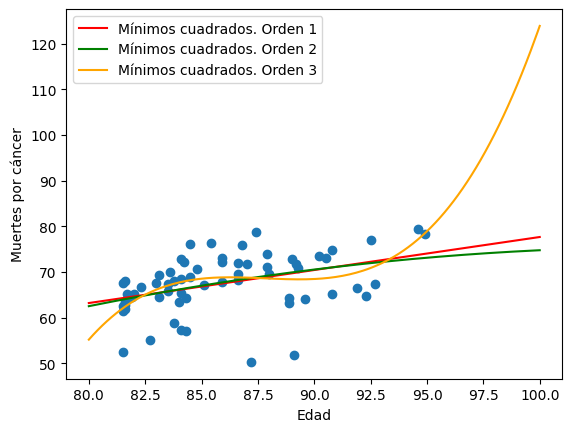

In [ ]:
data=np.loadtxt("DatosCancer.txt",delimiter=",").T #Delimitados por coma ya que es archivo separado por comas, .T indica la transpuesta

#Datos originales

x=data[0]#De data, el primer arreglo es de años
y=data[1] #De data, el segundo arreglo es de los records

plt.scatter(x,y)
B=np.linspace(80,100,200)
A=w(x,y)
C=w2(x,y)
D=w3(x,y)

#Modelo predictor de orden 1
Puntos=pol(B,A)
plt.plot(B,Puntos,color="red",label="Mínimos cuadrados. Orden 1")

#Modelo predictor de orden 2
Puntos2=pol(B,C)
plt.plot(B,Puntos2,color="green",label="Mínimos cuadrados. Orden 2")

#Modelo predictor de orden 3
Puntos3=pol(B,D)
plt.plot(B,Puntos3,color="orange",label="Mínimos cuadrados. Orden 3")

plt.xlabel("Edad")
plt.ylabel("Muertes por cáncer")
plt.legend()
plt.show()
#Datos al cuadrado, orden 1 y 2

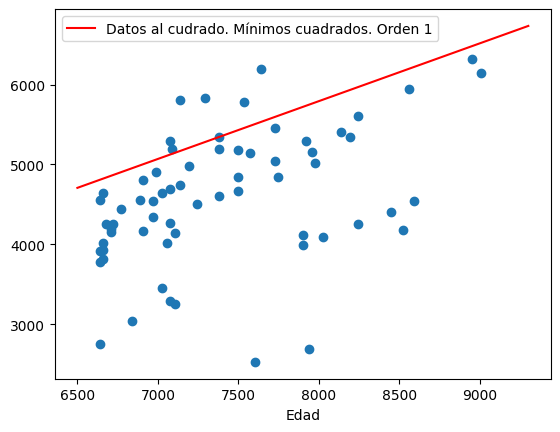

In [ ]:
#Ajusto datos al cuadrado pero NO los polinomios
B2=np.linspace(6500,9300,30000)

A2=w(x**2,y**2)
C2=w2(x**2,y**2)
D2=w3(x**2,y**2)


plt.scatter(x**2,y**2) #Puntos al cuAdrado


PuntosA2=pol(B2,A)
PuntosC2=pol(B2,C)
PuntosD2=pol(B2,D)

plt.plot(B2,PuntosA2,color="red",label="Datos al cudrado. Mínimos cuadrados. Orden 1") #Modelo predictor de orden 1

plt.xlabel("Edad")
plt.legend("Muertes por cáncer")

plt.legend()
plt.show()

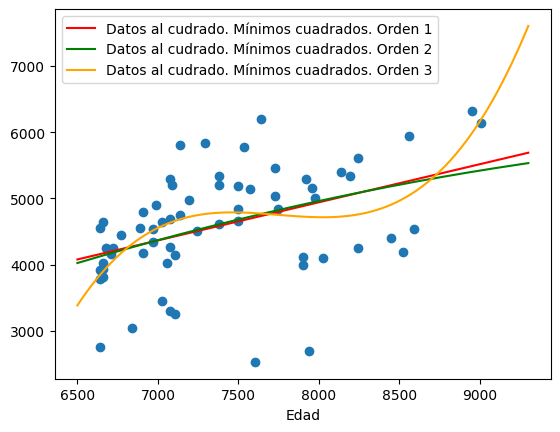

In [ ]:
#Ajusto datos y polinomios al cuadrado
B2=np.linspace(6500,9300,30000)

A2=w(x**2,y**2)
C2=w2(x**2,y**2)
D2=w3(x**2,y**2)


plt.scatter(x**2,y**2) #Puntos al cuAdrado

PuntosA2=pol(B2,A2)
PuntosC2=pol(B2,C2)
PuntosD2=pol(B2,D2)

plt.plot(B2,PuntosA2,color="red",label="Datos al cudrado. Mínimos cuadrados. Orden 1") #Modelo predictor de orden 1
plt.plot(B2,PuntosC2,color="green",label="Datos al cudrado. Mínimos cuadrados. Orden 2") #Modelo predictor de orden 2
plt.plot(B2,PuntosD2,color="orange",label="Datos al cudrado. Mínimos cuadrados. Orden 3") #Modelo predictor de orden 3

plt.xlabel("Edad")
plt.legend("Muertes por cáncer")

plt.legend()
plt.show()

Entre los 3 polinomios que se usaron para aproximar los datos, el de primer y segundo orden parecen tener un comportamiento similar mientras que el de tercero hay regiones donde se acerca bastante bien pero hay otras regiones donde no. Los polinomios de primer y segundo orden muestran bien la tendencia de que a mayor edad el ratio de muerte es mayor, si bien el polinomio de 3er orden también muestra esta tendencia el ritmo de crecimiento es bastante diferente.

Para cuando elevaron los datos al cuadrado y NO los polinomios sólo se grafico con un polinomio de orden 1, ya que los polinomios de orden 2 y 3 se alejan bastante de los nuevo puntos, en cambio si se ajustan también los polinomios resultan datos prácticamente idénticos a como si los datos no estuvieran al cuadrado

En general en los datos se observa que conforme la edad incrementa también lo hace el ratio de muerte en pacientes de cáncer